<a href="https://colab.research.google.com/github/20130297-PhamHoangKhuong/PhamHoangKhuong/blob/main/Lab_10_20130297_PhamHoangKhuong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods** using sklearn api.

*   **Deadline: 23:59, 20/5/2024**



In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Colab Notebooks'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Colab Notebooks


In [2]:
!pip install pandas

# Import libraries

In [9]:
# code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from prettytable import PrettyTable
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [14]:
# code
# Load dữ liệu Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Chia dữ liệu thành tập train và tập test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo mô hình SVM
svm_model = SVC(kernel='linear')

# Áp dụng cross-validation với 5 folds
scores = cross_val_score(svm_model, X_train, y_train, cv=5)

# Đánh giá kết quả cross-validation
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [1.         0.95833333 0.875      1.         0.95833333]
Mean accuracy: 0.9583333333333334


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest**, **kNN** algorithm with cross validation

In [15]:
# code
# Chọn các đặc trưng tốt nhất thông qua SelectKBest và chi2
k_best_features = SelectKBest(chi2, k=2).fit_transform(X, y)

# Chia dữ liệu thành tập train và tập test
X_train, X_test, y_train, y_test = train_test_split(k_best_features, y, test_size=0.2, random_state=42)

# Tạo mô hình RandomForest
rf_model = RandomForestClassifier()

# Áp dụng cross-validation với 5 folds cho RandomForest
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5)

# Đánh giá kết quả cross-validation của RandomForest
print("RandomForest cross-validation scores:", rf_scores)
print("RandomForest mean accuracy:", rf_scores.mean())

# Tạo mô hình kNN
knn_model = KNeighborsClassifier()

# Áp dụng cross-validation với 5 folds cho kNN
knn_scores = cross_val_score(knn_model, X_train, y_train, cv=5)

# Đánh giá kết quả cross-validation của kNN
print("kNN cross-validation scores:", knn_scores)
print("kNN mean accuracy:", knn_scores.mean())

RandomForest cross-validation scores: [1.         0.95833333 0.83333333 0.95833333 0.95833333]
RandomForest mean accuracy: 0.9416666666666668
kNN cross-validation scores: [0.95833333 1.         0.83333333 1.         0.95833333]
kNN mean accuracy: 0.95


*  1.3 Compare the obtained results of these approaches (SVM, RandomForest, kNN) using PrettyTable

In [16]:
# code
# Tạo bảng dữ liệu
table = PrettyTable()
table.field_names = ["Approach", "Cross-validation Scores", "Mean Accuracy"]
table.add_row(["SVM", scores, scores.mean()])
table.add_row(["RandomForest", rf_scores, rf_scores.mean()])
table.add_row(["kNN", knn_scores, knn_scores.mean()])

# In ra bảng dữ liệu
print(table)

+--------------+----------------------------------------------------------+--------------------+
|   Approach   |                 Cross-validation Scores                  |   Mean Accuracy    |
+--------------+----------------------------------------------------------+--------------------+
|     SVM      | [1.         0.95833333 0.875      1.         0.95833333] | 0.9583333333333334 |
| RandomForest | [1.         0.95833333 0.83333333 0.95833333 0.95833333] | 0.9416666666666668 |
|     kNN      | [0.95833333 1.         0.83333333 1.         0.95833333] |        0.95        |
+--------------+----------------------------------------------------------+--------------------+


#Task 2. With fashion dataset:
*   2.1. Apply **K-Means** algorithm using k=10,

In [7]:
# code
# Load dữ liệu Fashion-MNIST
fashion_mnist = fetch_openml('Fashion-MNIST', version=1, cache=True, parser='auto')

# Lấy dữ liệu và nhãn từ tập dữ liệu
X = fashion_mnist.data
y = fashion_mnist.target

# Áp dụng thuật toán K-Means với k=10
kmeans = KMeans(n_clusters=10, n_init=5, random_state=42)
kmeans.fit(X)

# Tính toán độ chính xác
kmeans_labels = kmeans.labels_
accuracy = adjusted_rand_score(y, kmeans_labels)

# In ra các center points (tâm cụm) của các nhóm
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# In ra nhãn dự đoán của các điểm dữ liệu
print("Predicted Labels:")
print(kmeans.labels_)
print("K-Means Accuracy: ", accuracy)

Cluster Centers:
[[3.38944752e-04 7.68274771e-03 6.10100554e-02 ... 2.64535081e+00
  5.89424924e-01 6.38345950e-02]
 [1.56407105e-03 2.79298402e-03 1.78750978e-02 ... 3.10847950e+00
  1.34029717e+00 8.46832756e-02]
 [4.41072689e-04 9.08609739e-03 5.06351447e-02 ... 6.37394143e+00
  9.20518701e-01 5.22230064e-02]
 ...
 [1.29020059e-17 1.07368731e-02 1.07368731e-02 ... 5.80364760e+00
  2.65127225e+00 2.02088542e-01]
 [1.00830802e-17 1.82083030e-03 2.03932993e-02 ... 6.28550619e-01
  4.81063365e-01 1.32192280e-01]
 [2.64069979e-03 2.64069979e-03 7.92209936e-03 ... 4.37365902e-02
  7.59201188e-03 1.81548110e-03]]
Predicted Labels:
[7 4 3 ... 0 3 1]
K-Means Accuracy:  0.38486542942077084


*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **SVM** in terms of accuracy, precision, recall, f1 using cross validation.


In [8]:
# code
# Load dữ liệu Fashion-MNIST
fashion_mnist = fetch_openml('Fashion-MNIST', version=1, cache=True, parser='auto')
X = fashion_mnist.data
y = fashion_mnist.target

# Giới hạn kích thước dữ liệu cho K-Means
kmeans_data = X[:5]
kmeans_labels = y[:5]

# K-Means
kmeans = KMeans(n_clusters=5, n_init=5, random_state=42)
kmeans.fit(kmeans_data)
kmeans_predictions = kmeans.predict(kmeans_data)
kmeans_accuracy = accuracy_score(kmeans_labels, kmeans_predictions)

# Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_scores = cross_val_score(rf_classifier, X, y, cv=5)
rf_accuracy = rf_scores.mean()

# kNN
knn_classifier = KNeighborsClassifier()
knn_scores = cross_val_score(knn_classifier, X, y, cv=5)
knn_accuracy = knn_scores.mean()

# Print accuracy scores
print("Accuracy Scores:")
print("K-Means: ", kmeans_accuracy)
print("Random Forest: ", rf_accuracy)
print("kNN: ", knn_accuracy)

# Calculate additional metrics using the best performing algorithm (e.g., Random Forest)
rf_classifier.fit(X, y)
y_pred = rf_classifier.predict(X)
precision = precision_score(y, y_pred, average='macro')
recall = recall_score(y, y_pred, average='macro')
f1 = f1_score(y, y_pred, average='macro')

# Print additional metrics
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

Accuracy Scores:
K-Means:  0.0
Random Forest:  0.8834142857142858
kNN:  0.8561285714285715
Precision:  1.0
Recall:  1.0
F1-score:  1.0


*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

In [ ]:
# code
## Supervised learning ##

2.4. Apply **AgglomerativeClustering** algorithm to fashion dataset using the number of clusters is 10

In [5]:
# code
# Load the Fashion-MNIST dataset
fashion_mnist = fetch_openml('Fashion-MNIST', version=1, cache=True, as_frame=False, parser='auto')

# Extract the data and labels
data = fashion_mnist.data
labels = fashion_mnist.target

# Specify the number of clusters
n_clusters = 10

# Create a random sample of the data
np.random.seed(0)
sample_indices = np.random.choice(len(data), 10, replace=False)
data_sample = data[sample_indices]

# Create an instance of AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=n_clusters)

# Fit the model to the data sample
labels_pred = clustering.fit_predict(data_sample)

# Print the predicted cluster labels
print(labels_pred)

[5 7 9 8 6 2 3 4 1 0]


#Task 3.
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





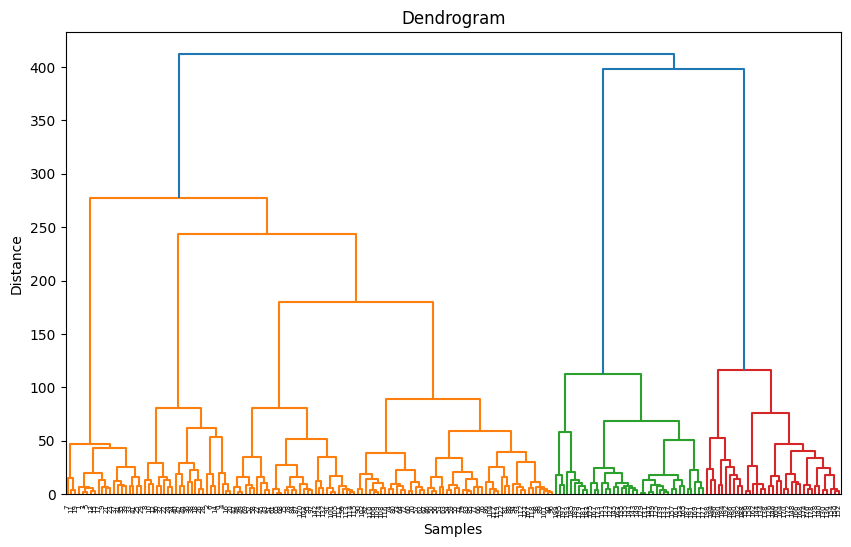

In [8]:
# code
# Load the dataset
data = pd.read_csv('shopping-data.csv')

# Drop categorical attributes
data = data.drop(['CustomerID', 'Genre'], axis=1)

# Perform hierarchical clustering
Z = linkage(data, method='ward')

# Create and plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

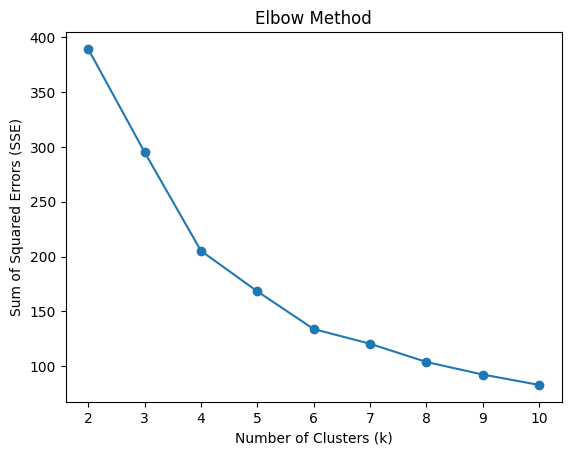

In [11]:
# code
# Load the preprocessed dataset
data = pd.read_csv('shopping-data.csv')

# Drop categorical attributes
data = data.drop(['CustomerID', 'Genre'], axis=1)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Initialize a list to store SSE values
sse = []

# Try different values of k
k_values = range(2, 11)
for k in k_values:
    # Create a KMeans instance
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)

    # Fit the model to the scaled data
    kmeans.fit(data_scaled)

    # Compute SSE and append it to the list
    sse.append(kmeans.inertia_)

# Plot SSE values
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method')
plt.show()

*   3.3. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

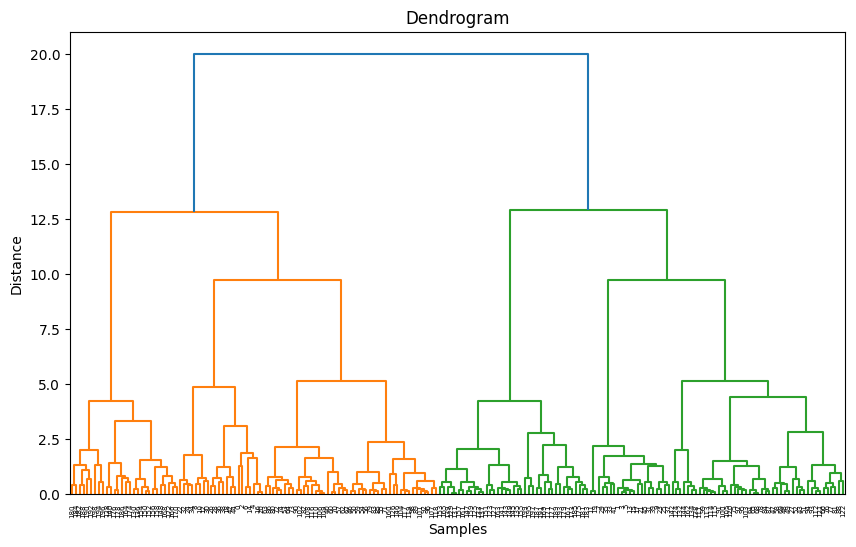

Cluster
0    95
1    66
2    39
Name: count, dtype: int64
KMeans_Cluster
2    91
0    68
1    41
Name: count, dtype: int64


In [13]:
# code
# Load the dataset
data = pd.read_csv('shopping-data.csv')

# Drop categorical attributes
data = data.drop(['CustomerID', 'Genre'], axis=1)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Perform hierarchical clustering
Z = linkage(data_scaled, method='ward')

# Create and plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

# Choose the number of clusters based on the dendrogram
n_clusters = 3  # Choose the appropriate number of clusters

# Apply AgglomerativeClustering
agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
labels = agglomerative.fit_predict(data_scaled)

# Assign the cluster labels to the original dataset
data['Cluster'] = labels

# Print the resulting clusters
print(data['Cluster'].value_counts())

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
kmeans.fit(data_scaled)
kmeans_labels = kmeans.labels_

# Assign the cluster labels from K-Means to the original dataset
data['KMeans_Cluster'] = kmeans_labels

# Print the resulting clusters from K-Means
print(data['KMeans_Cluster'].value_counts())

#Finally,
Save a copy in your Github. Remember renaming the notebook.